In [85]:
#expand cell width to 100%
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [86]:
import numpy as np
import pandas as pd
from ast import literal_eval
import re

In [87]:
import pandas as pd
dataFrameAddress="D:/Non-academic/GSOC23/GammaRaySpectroscopy/Dataset/5DegreeDataset.csv"
dataFrame=pd.read_csv(dataFrameAddress)

In [88]:
dataFrame.head()

,Unnamed: 0,minLats,maxLats,minLongs,maxLongs,averageSpectra,aluminum,calcium,iron,magnesium,oxygen,potassium,silicon,thorium,titanium,uranium
0,0,-90.0,-87.5,-180.0,180.0,[29.81520623 6.77182229 6.50824773 8.760701...,15.151,11.456,3.6233,3.5168,45.289,299.99,20.793,0.46453,0.17034,0.17684
1,1,-87.5,-82.5,-180.0,-135.0,[23.23357393 5.64114848 6.28640883 8.026030...,13.394,10.459,4.2466,4.2240,45.529,376.77,22.029,0.65727,0.11806,0.14017
2,2,-87.5,-82.5,-135.0,-90.0,[23.23357393 5.64114848 6.28640883 8.026030...,13.634,12.915,4.1853,3.5352,44.660,375.20,20.907,0.59783,0.16417,0.25209
3,3,-87.5,-82.5,-90.0,-45.0,[23.23357393 5.64114848 6.28640883 8.026030...,14.642,12.301,3.8019,3.6490,44.706,255.60,20.687,0.44024,0.21359,0.15456
4,4,-87.5,-82.5,-45.0,0.0,[23.23357393 5.64114848 6.28640883 8.026030...,14.030,13.188,3.6497,3.4253,44.777,299.84,20.930,0.41695,0.00000,0.17853


In [89]:
averageSpectra=dataFrame['averageSpectra']
#iterate through the spectra
for i in range(averageSpectra.shape[0]):
    #remove new line characters
    averageSpectra[i]=averageSpectra[i].replace('\n','')
    averageSpectra[i]=averageSpectra[i].strip()
    averageSpectra[i]=averageSpectra[i].replace(' ',',')
    averageSpectra[i]=np.array(list(map(float,re.findall("-?\d+\.\d+",averageSpectra[i]))))
#convert the spectra to numpy array
averageSpectra=averageSpectra.to_numpy()
averageSpectra=np.vstack(averageSpectra)

C:\Users\104D\AppData\Local\Temp\ipykernel_10300\2164734755.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  averageSpectra[i]=averageSpectra[i].replace('\n','')
C:\Users\104D\AppData\Local\Temp\ipykernel_10300\2164734755.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  averageSpectra[i]=averageSpectra[i].strip()
C:\Users\104D\AppData\Local\Temp\ipykernel_10300\2164734755.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  averag

In [90]:
#get oxygen values
oxygenAbundance=dataFrame['oxygen'].to_numpy()
#get thorium values
thoriumAbundance=dataFrame['thorium'].to_numpy()

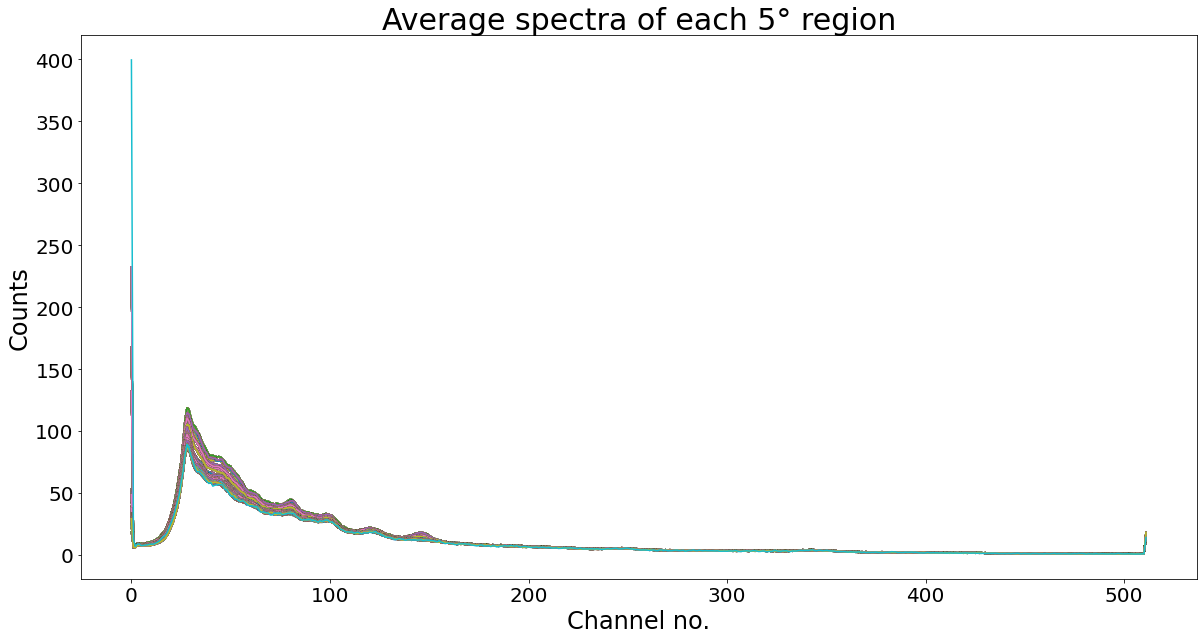

In [91]:
#plot all the spectra
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Channel no.",fontsize=24)
plt.ylabel("Counts",fontsize=24)
plt.title("Average spectra of each 5\u00B0 region",fontsize=30)

#get create an array containing number of bands
channels=np.arange(averageSpectra.shape[1])
for i in range(averageSpectra.shape[0]):
    plt.plot(channels,averageSpectra[i,:])

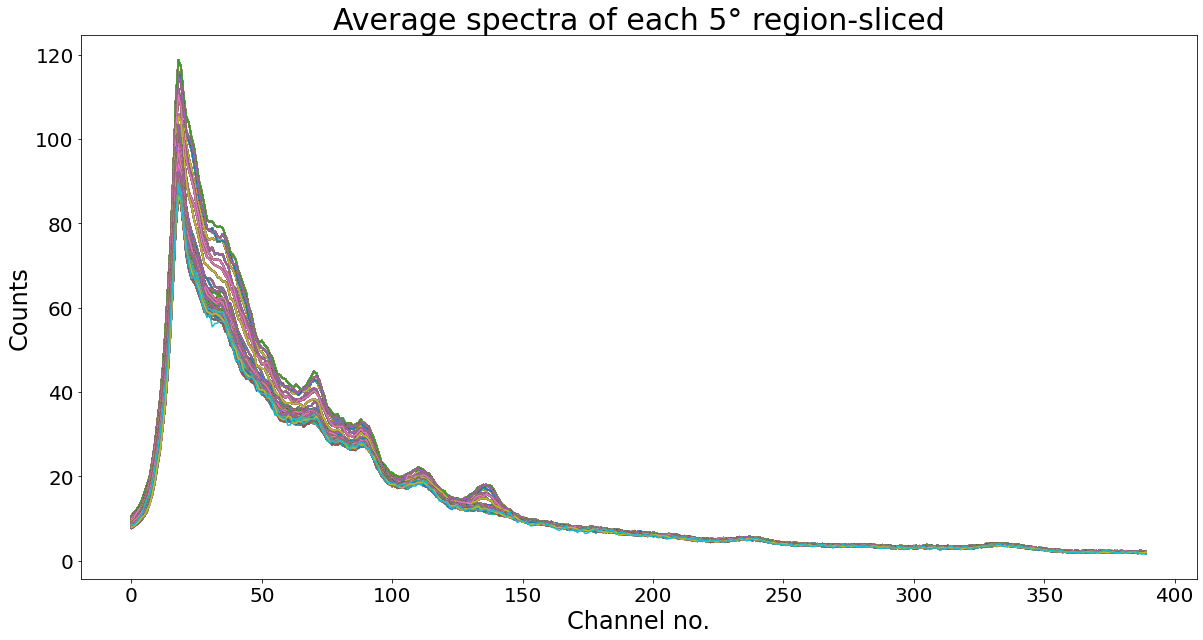

In [92]:
#subset the spectra to remove the first and last parts that have no features
averageSpectra=averageSpectra[:,10:400]
plt.figure(figsize=(20,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Channel no.",fontsize=24)
plt.ylabel("Counts",fontsize=24)
plt.title("Average spectra of each 5\u00B0 region-sliced",fontsize=30)

#get create an array containing number of bands
channels=np.arange(averageSpectra.shape[1])
for i in range(averageSpectra.shape[0]):
    plt.plot(channels,averageSpectra[i,:])

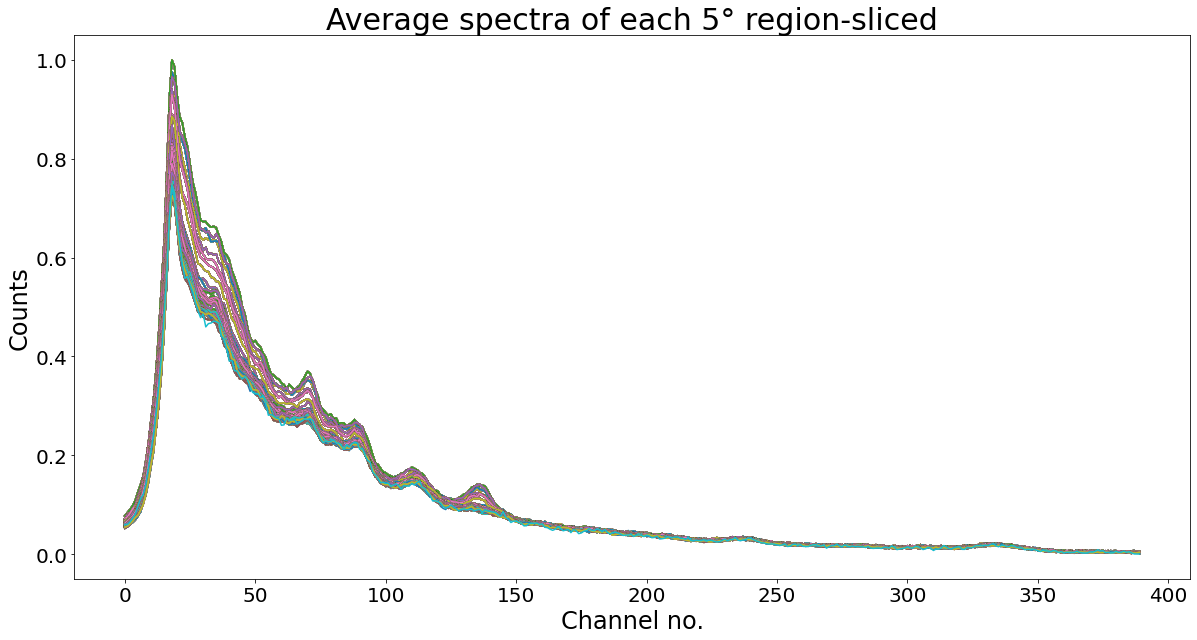

In [93]:
#scale the spectra between 0 and 1
copySpectra=np.copy(averageSpectra)
averageSpectra=(averageSpectra-np.amin(averageSpectra))/np.ptp(averageSpectra)
plt.figure(figsize=(20,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Channel no.",fontsize=24)
plt.ylabel("Counts",fontsize=24)
plt.title("Average spectra of each 5\u00B0 region-sliced",fontsize=30)

#get create an array containing number of bands
channels=np.arange(averageSpectra.shape[1])
for i in range(averageSpectra.shape[0]):
    plt.plot(channels,averageSpectra[i,:])

In [94]:
#import PCA
from sklearn.decomposition import PCA

In [95]:
#transform the data using PCA
pca=PCA()
pca.fit(averageSpectra)
#print the explained variance ratio
print("Variance (ratio) explained by succesive PC's:")
print(np.cumsum(pca.explained_variance_ratio_))
#get the number of bands required to explained over 0.99% of the variance
noOfPCsToRetain=np.where(np.cumsum(pca.explained_variance_ratio_)>0.99)[0][0]+1
#transform the data
transformedData=pca.transform(averageSpectra)[:,:noOfPCsToRetain]

Variance (ratio) explained by succesive PC's:
[0.97855645 0.98987745 0.99196096 0.99288113 0.99355891 0.99417061
 0.99468631 0.99518332 0.99566238 0.99604697 0.99642058 0.99677447
 0.99706583 0.99735057 0.99762882 0.99788055 0.9981094  0.99832281
 0.99852395 0.99870803 0.99886967 0.99901869 0.99915965 0.99928386
 0.99939773 0.9995031  0.99959355 0.99966866 0.99973962 0.9997987
 0.99985339 0.99990146 0.99994153 0.99996913 0.99998567 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.     

In [96]:
#scale the output values
scaledOxygenAbundances=(oxygenAbundance-np.min(oxygenAbundance))/np.ptp(oxygenAbundance)
scaledThoriumAbundance=(thoriumAbundance-np.min(thoriumAbundance))/np.ptp(thoriumAbundance)


In [97]:
#break the dataset into training and test data
indices=np.arange(averageSpectra.shape[0])
#set the number of the training and test samples
trainingSamplesNo=int(0.7*averageSpectra.shape[0])
testSamplesNo=averageSpectra.shape[0]-trainingSamplesNo
trainingIndices=np.random.choice(indices,size=trainingSamplesNo,replace=False)
testIndices=np.delete(indices,trainingIndices)
#break spectra and abundances into test and training datasets
trainingInputData=transformedData[trainingIndices,:]
testInputData=transformedData[testIndices,:]
trainingOxygenAbundance=scaledOxygenAbundances[trainingIndices]
testOxygenAbundance=scaledOxygenAbundances[testIndices]
trainingThoriumAbundance=scaledThoriumAbundance[trainingIndices]
testThoriumAbundance=scaledThoriumAbundance[testIndices]

In [98]:
#import Random forest from sklearn
from sklearn.ensemble import RandomForestRegressor

In [99]:
#create a random forest regressor
randomForest=RandomForestRegressor(n_estimators=120,max_depth=9,random_state=0)
#fit and predict oxygen abundance
randomForest.fit(trainingInputData,trainingOxygenAbundance)
trainingOxygenPredictedValues=randomForest.predict(trainingInputData)
testOxygenPredictedValues=randomForest.predict(testInputData)

In [100]:
#create a random forest regressor
randomForest=RandomForestRegressor(n_estimators=120,max_depth=9,random_state=0)
#fit and predict thorium abundance
randomForest.fit(trainingInputData,trainingThoriumAbundance)
trainingThoriumPredictedValues=randomForest.predict(trainingInputData)
testThoriumPredictedValues=randomForest.predict(testInputData)

In [101]:
#import r2
from sklearn.metrics import mean_squared_error

In [102]:
#compute training and test metrics for oxygen
oxygenTrainingRMSE=mean_squared_error(trainingOxygenAbundance,
                          trainingOxygenPredictedValues,
                                      squared=False)

oxygenTestRMSE=mean_squared_error(testOxygenAbundance,
                      testOxygenPredictedValues,
                                      squared=False)

In [103]:
print(f"Oxygen abundance RMSE for Random forest:")
print(f"Training Set:{round(oxygenTrainingRMSE,2)}\t\tTest Set:{round(oxygenTestRMSE,2)}")

Oxygen abundance RMSE for Random forest:
Training Set:0.14		Test Set:0.14


In [104]:
#compute training and test metrics for oxygen
thoriumTrainingRMSE=mean_squared_error(trainingThoriumAbundance,
                          trainingThoriumPredictedValues,
                                      squared=False)

thoriumTestRMSE=mean_squared_error(testThoriumAbundance,
                      testThoriumPredictedValues,
                                      squared=False)

In [105]:
print(f"Thorium abundance RMSE for Random forest:")
print(f"Training Set:{round(thoriumTrainingRMSE,2)}\t\tTest Set:{round(thoriumTestRMSE,2)}")

Thorium abundance RMSE for Random forest:
Training Set:0.17		Test Set:0.17


In [69]:
#import svr
from sklearn.svm import SVR
#import grid search
from sklearn.model_selection import GridSearchCV

In [70]:
#create SVR object
svr=SVR(kernel='poly',gamma=1)
#create a dictionary corresponding to the grid of spectral parameters
gridParameters={'C':[0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10],
                'epsilon':[0.01,0.02,0.05,0.1,0.2,0.5,1],
                'degree':[2,3,4],
                'coef0':[0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10]}

In [32]:
#create the grid
parameterGrid=GridSearchCV(svr,gridParameters)
parameterGrid.fit(trainingInputData,trainingThoriumAbundance)

GridSearchCV(estimator=SVR(gamma=1, kernel='poly'),
             param_grid={'C': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10],
                         'coef0': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5,
                                   10],
                         'degree': [2, 3, 4],
                         'epsilon': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]})

In [34]:
#print the best parameters
print(parameterGrid.best_params_)

{'C': 10, 'coef0': 5, 'degree': 4, 'epsilon': 0.1}


In [106]:
#create SVR object
svr=SVR(kernel='poly',gamma=1,C=10,coef0=5,degree=4,epsilon=0.1)
#fit the model to the training data
svr.fit(trainingInputData,trainingThoriumAbundance)
#predict the training and test values and display the R2-scores
predictedTrainingValues=svr.predict(trainingInputData)
predictedTestValues=svr.predict(testInputData)
print(f"Thorium Metrics with Polynomial Kernel\nTraning RMSE:{round(mean_squared_error(trainingThoriumAbundance,predictedTrainingValues,squared=False),2)}\t\tTest RMSE:{round(mean_squared_error(testThoriumAbundance,predictedTestValues,squared=False),2)}")

Thorium Metrics with Polynomial Kernel
Traning RMSE:0.18		Test RMSE:0.17


In [74]:
#create the grid
parameterGrid=GridSearchCV(svr,gridParameters)
parameterGrid.fit(trainingInputData,trainingOxygenAbundance)

GridSearchCV(estimator=SVR(C=10, coef0=5, degree=4, gamma=1, kernel='poly'),
             param_grid={'C': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10],
                         'coef0': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5,
                                   10],
                         'degree': [2, 3, 4],
                         'epsilon': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]})

In [75]:
#print the best parameters
print(parameterGrid.best_params_)

{'C': 2, 'coef0': 10, 'degree': 4, 'epsilon': 0.1}


In [107]:
#create SVR object
svr=SVR(kernel='poly',gamma=1,C=2,coef0=10,degree=4,epsilon=0.1)
#fit the model to the training data
svr.fit(trainingInputData,trainingOxygenAbundance)
#predict the training and test values and display the R2-scores
predictedTrainingValues=svr.predict(trainingInputData)
predictedTestValues=svr.predict(testInputData)
print(f"Oxygen Metrics with Polynomial Kernel\nTraning RMSE:{round(mean_squared_error(trainingOxygenAbundance,predictedTrainingValues,squared=False),2)}\t\tTest RMSE:{round(mean_squared_error(testOxygenAbundance,predictedTestValues,squared=False),2)}")

Oxygen Metrics with Polynomial Kernel
Traning RMSE:0.15		Test RMSE:0.14


In [108]:
#create SVR object
svr=SVR(kernel='rbf')
#fit the model to the training data
svr.fit(trainingInputData,trainingThoriumAbundance)
#predict the training and test values and display the R2-scores
predictedTrainingValues=svr.predict(trainingInputData)
predictedTestValues=svr.predict(testInputData)
print(f"Thorium Metrics with RBF Kernel\nTraning RMSE:{round(mean_squared_error(trainingThoriumAbundance,predictedTrainingValues,squared=False),2)}\t\tTest RMSE:{round(mean_squared_error(testThoriumAbundance,predictedTestValues,squared=False),2)}")

Thorium Metrics with Polynomial Kernel
Traning RMSE:0.18		Test RMSE:0.17


In [109]:
#create SVR object
svr=SVR(kernel='rbf')
#fit the model to the training data
svr.fit(trainingInputData,trainingOxygenAbundance)
#predict the training and test values and display the R2-scores
predictedTrainingValues=svr.predict(trainingInputData)
predictedTestValues=svr.predict(testInputData)
print(f"Oxygen Metrics with RBF Kernel\nTraning RMSE:{round(mean_squared_error(trainingOxygenAbundance,predictedTrainingValues,squared=False),2)}\t\tTest RMSE:{round(mean_squared_error(testOxygenAbundance,predictedTestValues,squared=False),2)}")

Oxygen Metrics with RBF Kernel
Traning RMSE:0.15		Test RMSE:0.14
